# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# импортируем вспомогательные библиотеки и устанавливаем тип сетки диаграмм
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
# Найдем средний процент возврата кредита по всем данным
debt_mean_percent = (1 - data['debt'].sum() / data['debt'].count()) * 100
f"Средний процент возврата кредита по всем заемщикам составляет {debt_mean_percent:.2f}%"

'Средний процент возврата кредита по всем заемщикам составляет 91.88%'

In [24]:
# функция для расчета отклонения от среднего процента возврата кредита
def deviation_from_the_mean(value):
    return (1 - value.mean()) * 100 - debt_mean_percent

In [25]:
# Посмотрим во сколько раз количество вязтых кредитов в группе без детей 
# дольше количества  кредитов, вязтых заемщиками с детьми
ratio = data[data['children'] == 0]['debt'].count() / data[data['children'] > 0]['debt'].count()
print(f'Заемщики без детей берут кредит в {ratio:.0f} раза чаще, чем заемщики с детьми')

Заемщики без детей берут кредит в 2 раза чаще, чем заемщики с детьми


<AxesSubplot:title={'center':'Общее число взятых кредитов в группах с разным числом детей'}, xlabel='Количество детей у заемщика', ylabel='Количество взятых кредитов'>

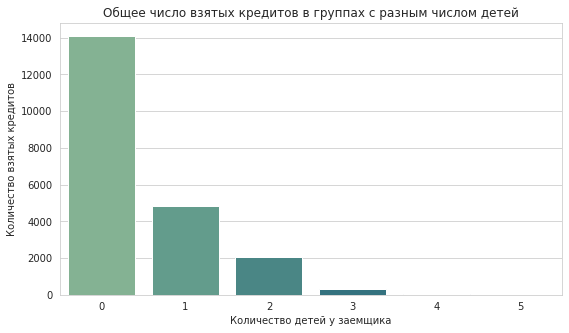

In [26]:
# Посмотрим общее количество взятых кредитов в зависимости от количества детей
plt.figure(figsize=(9, 5))
chart = sns.barplot(
    x=sorted(data['children'].unique()), 
    y=data.groupby('children')['debt'].count(),
    palette='crest'
)
chart.set_title('Общее число взятых кредитов в группах с разным числом детей')
plt.xlabel("Количество детей у заемщика")
plt.ylabel("Количество взятых кредитов")
chart

<AxesSubplot:title={'center':'Отклонение от среднего значения процента возврата кредита\n в группах с разным числом детей'}, xlabel='Количество детей у заемщика', ylabel='Отклонение'>

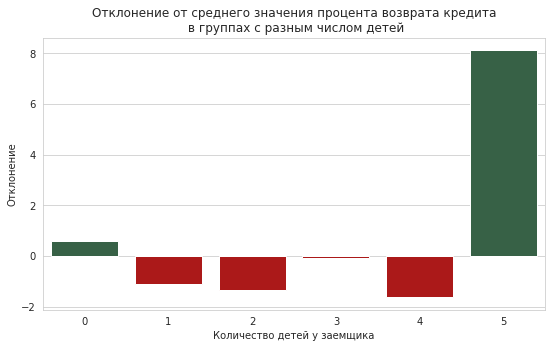

In [27]:
# найдем отклонение от среднего значения процента возврата кредита 
# для групп с разным количеством детей

plt.figure(figsize=(9, 5))
chart = sns.barplot(
    x=sorted(data['children'].unique()),
    y=data.groupby(data['children']).agg({'debt':deviation_from_the_mean})['debt'],
    palette=['#306844', '#c30101', '#c30101', '#c30101', '#c30101', '#306844'])
chart.set_title('Отклонение от среднего значения процента возврата кредита\n в группах с разным числом детей')
plt.xlabel("Количество детей у заемщика")
plt.ylabel("Отклонение")
chart

**Вывод**

   Выявлена зависимость между количеством детей и возвратом кредита в срок:
    
 - <u>Процент возврата</u> кредита <u>выше среднего значения</u> в группах заемщиков <u>без детей и с 5-ю детьми</u>.
 
 
 - <u>Выше всего риск</u> возникновения <u>задолженности</u> по кредиту наблюдается <u>в группе заемщиков с четырьмя детьми</u>.

**Дополнительные результаты исследования**

 -  Заемщики без детей берут кредит в 2 раза чаще, чем земщики с детьми. 
 -  Процент невозврата кредита составил 0% только для семей с 5-ю детьми.


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

<AxesSubplot:title={'center':'Общее количество взятых кредитов в зависимости от семейного положения'}, xlabel='Семейное положение', ylabel='Количество взятых кредитов'>

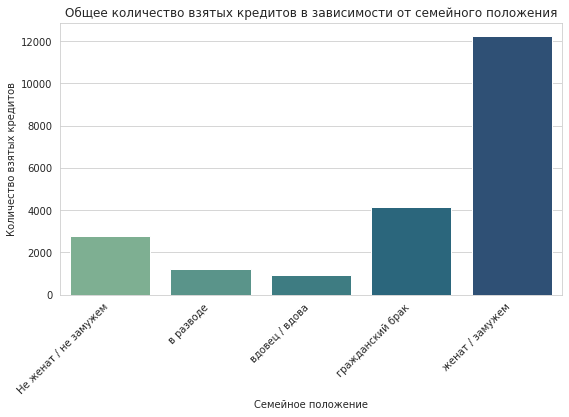

In [28]:
# Посмотрим общее количество взятых кредитов в зависимости от семейного положения
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.barplot(
    y=data.groupby(data['family_status'])['debt'].count(),
    x=data.groupby(data['family_status'])['debt'].count().index,
    palette='crest'
)
chart.set_title('Общее количество взятых кредитов в зависимости от семейного положения')
plt.xlabel("Семейное положение")
plt.ylabel("Количество взятых кредитов")
chart

<AxesSubplot:title={'center':'Отклонение от среднего значения процента возврата кредита\nв группах с разным семейным положением'}, xlabel='Семейное положение', ylabel='Отклонение'>

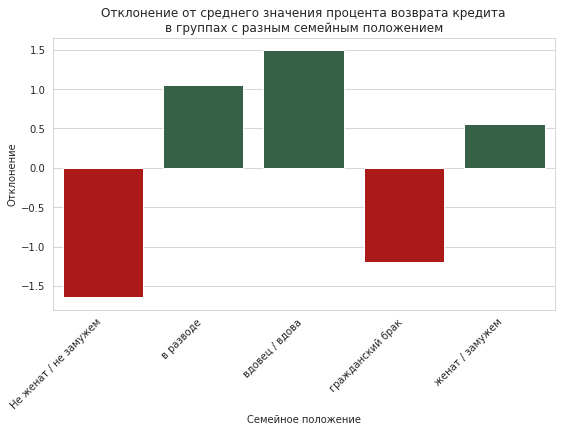

In [29]:
# найдем отклонение от среднего значения процента возврата кредита 
# для групп с разным семейным положением
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.barplot(
    y=data.groupby(data['family_status']).agg({'debt':deviation_from_the_mean})['debt'],
    x=data.groupby(data['family_status'])['debt'].count().index,
    palette=['#c30101', '#306844', '#306844', '#c30101', '#306844'] 
)
chart.set_title('Отклонение от среднего значения процента возврата кредита\nв группах с разным семейным положением')
plt.xlabel("Семейное положение")
plt.ylabel("Отклонение")
chart

**Вывод** 

Выявлена зависимость между семейным положением и возвратом кредита в срок:

<u>Ниже всего</u> процент возврата кредита в группе заемщиков, <u>никогда не состоявших в зарегистрированном браке.</u>
 
 **Дополнительные результаты исследования:**
 - Чаще всего берут кредит заемщики, состоящие в браке.
 - Процент возврата кредита выше среднего в группах со следующими статусами семейного положения: "вдовец / вдова", "в разводе", "женат / замужем". 

Мне кажется, что причина в уровне ответственности. Люди, которые привыкли нести ответственность не только за себя, но и за других (или даже просто ранее имели такой опыт), переносят этот опыт из сферы межличностных отношений  в сферу финансовых.

Еще одна причина – опыт планирования своих расходов. При планировании расходов всей семьи больше статей обязательных расходов. Как результат, каждый раз, когда хотим что-либо купить, начинаем думать, насколько это важно для нас, есть ли необходимость покупать эту вещь именно сейчас, может, запланировать ее на следующий месяц. Этот же алгоритм работает и при выплате кредита.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
# создадим список уровней дохода в более читабельном варианте
income_level = [
    '1 000 000 и выше', 
    '200 000 – 1 000 000',
    '50 000 – 200 000',
    '30 000 – 50 000',
    'менее 30 000'
]

<AxesSubplot:title={'center':'Общее количество взятых кредитов в зависимости от уровня дохода'}, xlabel='Уровень дохода', ylabel='Количество взятых кредитов'>

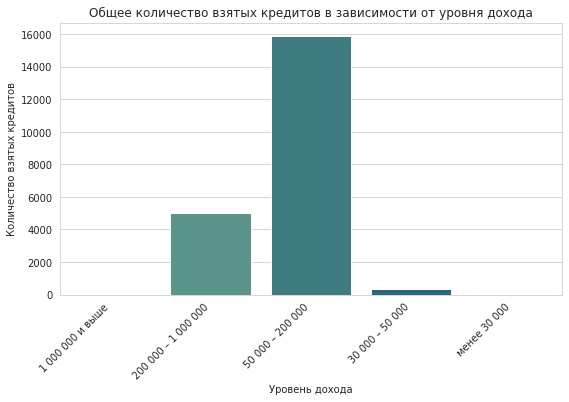

In [31]:
# Посмотрим общее количество взятых кредитов в зависимости от уровня дохода
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.barplot(
    x=income_level,
    y=data.groupby(data['total_income_category'])['debt'].count(),
    palette='crest'
)
chart.set_title('Общее количество взятых кредитов в зависимости от уровня дохода')
plt.xlabel("Уровень дохода")
plt.ylabel("Количество взятых кредитов")
chart

<AxesSubplot:title={'center':'Отклонение от среднего значения процента возврата кредита\nв группах с разным уровнем дохода'}, xlabel='Уровень дохода', ylabel='Отклонение'>

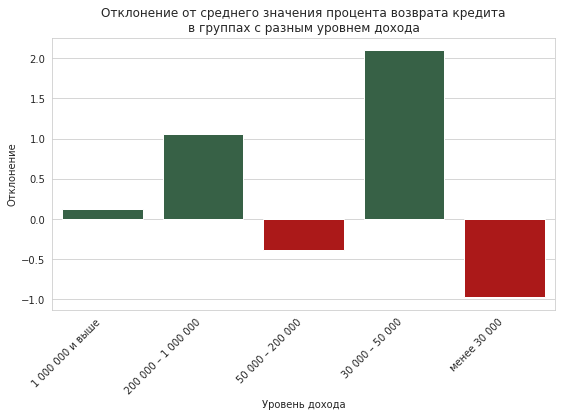

In [32]:
# найдем отклонение от среднего значения процента возврата кредита 
# для групп с разным уровнем дохода
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.barplot(
    x=income_level,
    y=data.groupby(data['total_income_category']).agg({'debt':deviation_from_the_mean})['debt'],
    palette=['#306844', '#306844', '#c30101','#306844', '#c30101']
)
chart.set_title('Отклонение от среднего значения процента возврата кредита\nв группах с разным уровнем дохода')
plt.xlabel("Уровень дохода")
plt.ylabel("Отклонение")
chart

**Вывод** 

Выявлена зависимость между уровнем дохода и возвратом кредита в срок:

 - <u>Выше</u> всего процент возврата кредита в группе <u>с уровнем дохода 30 000 - 50 000 </u> рублей в месяц.
 
 
 - <u>Ниже</u> всего процент возврата в группе с уровнем дохода <u>ниже 30 000</u> рублей в месяц.

**Дополнительные результаты исследования**
 - Чаще всего кредит берут заемщики со средним уровнем дохода.
 - Процент возврата кредита выше среднего значения в группах с уровнем дохода 30 - 50 тысяч рублей и больше 200 000 рублей в месяц.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:title={'center':'Общее количество взятых кредитов в зависимости от цели кредита'}, xlabel='Цель кредита', ylabel='Количество взятых кредитов'>

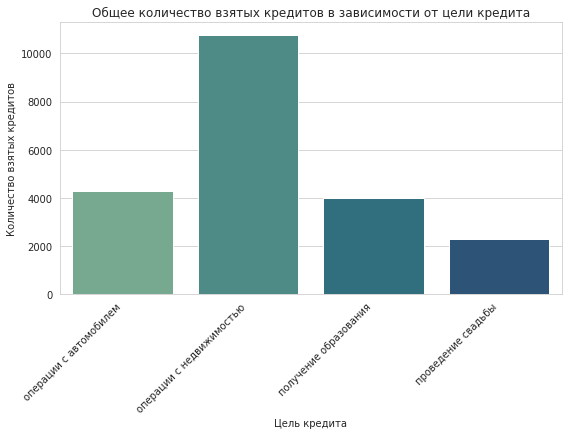

In [33]:
# Посмотрим общее количество взятых кредитов в зависимости от цели кредита
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.barplot(
    x=sorted(data['purpose_category'].unique()),
    y=data.groupby(data['purpose_category'])['debt'].count(),
    palette='crest'
)
chart.set_title('Общее количество взятых кредитов в зависимости от цели кредита')
plt.xlabel("Цель кредита")
plt.ylabel("Количество взятых кредитов")
chart

<AxesSubplot:title={'center':'Отклонение от среднего значения процента возврата кредита\nв группах с разными целями кредита'}, xlabel='Цель получения кредита', ylabel='Отклонение'>

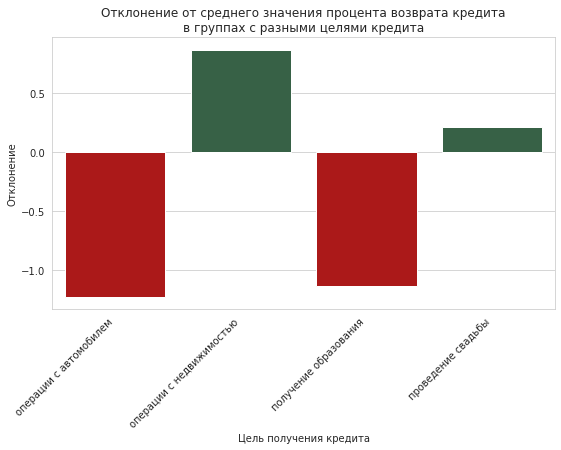

In [34]:
# найдем отклонение от среднего значения процента возврата кредита 
# по группам в зависимости от цели кредита
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.barplot(
    x=sorted(data['purpose_category'].unique()),
    y=data.pivot_table(
        index='purpose_category', 
        values='debt', 
        aggfunc=deviation_from_the_mean
    )['debt'],
    palette=['#c30101', '#306844', '#c30101','#306844']
)
chart.set_title('Отклонение от среднего значения процента возврата кредита\nв группах с разными целями кредита')
plt.xlabel("Цель получения кредита")
plt.ylabel("Отклонение")
chart

**Вывод** 

Выявлена зависимость между уровнем дохода и возвратом кредита в срок:

 - <u>Самый высокий процент</u> возврата кредита наблюдается в группе кредитов на <u>операции с недвижимостью</u>.
 
 
 - Процент возврата кредита <u>ниже среднего</u> значения для кредитов на <u>операции с автомобилем и получение образования</u>.

**Дополнительные результаты исследования**
 - Чаще всего кредиты берут для проведения операций с недвижимостью. 
 - Процент возврата кредита выдше среднего в группах "операции с недвижимостью" и "проведение свадьбы".

#### 3.4_1 Как уровень дохода и цели кредита влияют на его возврат в срок?

In [35]:
# Посмотрим, как меняется количество взятых кредитов
# в зависимости от уровня дохода заемщика и цели кредита
data.pivot_table(
    index='purpose_category', 
    columns='total_income_category', 
    values='debt', 
    aggfunc='count'
)

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,2,1022,3181,72,2
операции с недвижимостью,17,2558,7997,168,11
получение образования,4,890,3014,75,5
проведение свадьбы,2,544,1729,34,4


In [36]:
# отбросим столбцы, содержащие слишком мало данных
income_and_purpose_df = data[
    (data['total_income_category'] > 'A') 
    & (data['total_income_category'] < 'E')]

In [37]:
# найдем отклонение от среднего значения процента возврата кредита 
# по группам в зависимости от цели кредита и уровня дохода
income_and_purpose_df = income_and_purpose_df.pivot_table(
    index='purpose_category', 
    columns='total_income_category', 
    values='debt', 
    aggfunc=deviation_from_the_mean
)

Text(59.99999999999999, 0.5, 'Цель получения кредита')

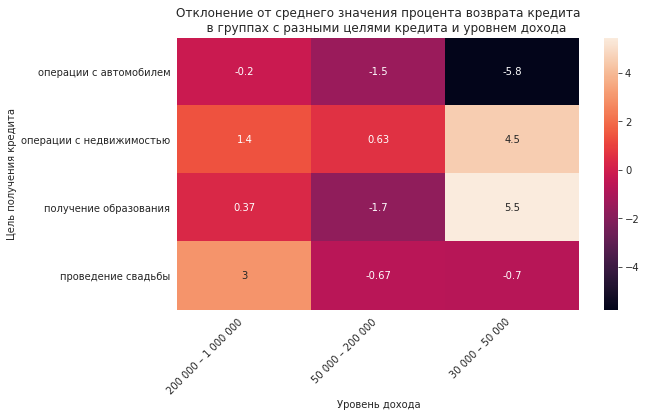

In [38]:
# построим тепловую карту для большей наглядности
plt.figure(figsize=(9, 5))
plt.xticks(rotation=45, ha='right')
chart = sns.heatmap(
    income_and_purpose_df, 
    annot=True,
    xticklabels=income_level[1:-1]    
)
chart.set_title(
    """Отклонение от среднего значения процента возврата кредита
    в группах с разными целями кредита и уровнем дохода"""
)
plt.xlabel("Уровень дохода")
plt.ylabel("Цель получения кредита")

**Вывод** 

Выявлена зависимость между уровнем дохода, целями кредита и возвратом средств в срок:

 - <u>Самый высокий процент</u> возврата кредита наблюдается в группе кредитов, выданных заемщикам <u>с невысоким уровнем дохода</u> (30 000 - 50 000) <u>на получение образования и операции с недвижимостью</u>.
 
 
 - <u>Самый низкий процент</u> возврата кредита  наблюдается в группе кредитов, выданных заемщикам <u>с невысоким уровнем дохода</u> (30 000 - 50 000) <u>на операции с автомобилем</u>.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В приведенном наборе данных пропуски присутствуют в столбцах с величиной трудового стажа и общего дохода. <b>Причины</b> этого могли быть следующие:
<ol>
    <li><b>Различный тип занятости.</b> В случае ИП и фриланса учет стажа и дохода ложится на самого заемщика.</li>
    <li><b>Недостаточная степень оцифрованниости персональных данных.</b> Например, если часть трудовой деятельности пришлась на период до введения цифрового документооборота.</li>
    <li><b>Намеренное сокрытие данных.</b> В случае фриланса недобросовестный работник может занижать доходы для уменьшения налоговых выплат.</li>
    <li><b>Человеческий фактор.</b> Ненамеренное случайное искажение данных при внесении учетных записей в базу.</li>
</ol>

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Для количественных переменных существует много способов рассчитать значение для заполнения пропуска. Преимущества использоавния медианного значения:
<ol>
    <li>Легко выполнить вычисления</li>
    <li>Медиана корректнее описывает данные, если в них присутсвуют несколько значений, заметно отличающихся от большинства по величине</li>
    <li>Медиану можно рассчитать не для всей выборки, а для отдельных подгрупп (в зависимости от какого-либо известного фактора, влияющего на обрабатываемую величину) и использовать эти значения для обработки пропусков</li>
<ol>

### Шаг 4: общий вывод.

Проведено исследование о связи количества детей, семейного положения, уровня дохода и цели кредита с фактом возврата кредита в срок.

**Основные результаты**

Средний процент возврата кредита по всем заемщикам составляет 91.88%.


Факторы, **положительно влияющие** на возврат кредита в срок: 
 - заемщик либо не имеет детей либо имеет 5 детей.
 - заемщик указал семейное положение "вдовец / вдова", "в разводе" или "женат / замужем".
 - заемщик имеет уровень дохода 30 000 - 50 000 или выше 200 000 рублей в месяц.
 - заемщик берет кредит с целью проведения операций с недвижимостью.

Группы заемщиков с **самыми низкими показателями возврата кредита**:
 - имеют четырех детей;
 - никогда не состояли в зарегистрированном браке;
 - имеют доходы ниже 30 000 рублей в месяц;
 - берут кредит на операции с автомобилем или получение образования.